In [1]:
#字符提取的步奏
#1. 滤波  2.灰度处理  3.边缘检测
#4.二值化处理 （如果选用的是绿色车牌，和蓝色车牌有什么区别，该如何处理？）
#5.形态学处理  6.查找和绘制轮廓
#7. 轮廓的最小矩形框，调用cv2.boundingRect()方法
#8.根据矩形框的宽高比定位到字符（因为有多个字符需要排序）
#9.在原图上进行裁剪获得字符

In [2]:
import cv2
import numpy as np
import copy
from imutils import *
import matplotlib.pyplot as plt

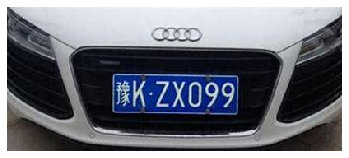

In [3]:
image=imread('img.jpg')
img=image
image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

show(img)

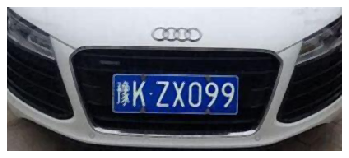

In [4]:
img=cv2.medianBlur(img,3)
show(img)

In [5]:
#灰度处理
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img=cv2.Canny(img,50,200)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#膨胀腐蚀
dilate = cv2.dilate(img,None,iterations=6)
cv2.imshow('dilate',dilate)
erode=cv2.erode(dilate,None,iterations=1)
cv2.imshow('erode',erode)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
contours,hierarchy=cv2.findContours(erode,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
o=image.copy()
cv2.drawContours(o,contours,-1,(255,0,255),1)#绘制轮廓
cv2.imshow('o',o)
cv2.waitKey(0)
cv2.destroyAllWindows()

13


In [10]:
o=image.copy()
cv2.drawContours(o,contours,9,(255,0,255),1)#绘制轮廓
cv2.imshow('o',o)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
x,y,w,h=cv2.boundingRect(contours[9])
print(x,y,w,h)
print(image.shape)
dst=image[y:y+h,x:x+w]#这里注意 在OpenCV里的宽和高 x和y的区分开
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

122 75 165 62
(175, 407, 3)


In [12]:
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)  # 转换了灰度化
ret,img_th  = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('img_t',img_th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#膨胀腐蚀
dilate = cv2.dilate(img_th,None,iterations=1)
cv2.imshow('dilate',dilate)
erode=cv2.erode(dilate,None,iterations=1)
cv2.imshow('erode',erode) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
contours,hierarchy=cv2.findContours(erode,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
o=dst.copy()
cv2.drawContours(o,contours,-1,(255,0,255),1)#绘制轮廓
cv2.imshow('o',o)
cv2.waitKey(0)
cv2.destroyAllWindows()

16


In [17]:
# 查找轮廓
o=dst.copy()
contours, hierarchy = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
words = []
word_images = []
#对所有轮廓逐一操作
for item in contours:
    word = []
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    word.append(x)
    word.append(y)
    word.append(weight)
    word.append(height)
    words.append(word)
# 排序，车牌号有顺序。words是一个嵌套列表
words = sorted(words,key=lambda s:s[0],reverse=False)
i = 0
#word中存放轮廓的起始点和宽高
for word in words:
    # 筛选字符的轮廓
    if (word[3]>word[2] and word[3]>word[2]*1.2 and (word[2]*2.3)):
        i = i+1
        splite_image = o[word[1]:word[1] + word[3], word[0]:word[0] + word[2]]
        word_images.append(splite_image)
#         print(i)
print(words)
m=1
for i,j in enumerate(word_images):  
    cv2.imshow('img'+str(m),word_images[i])#彩色图
#     print(word_images[i].shape)
    m=m+1
cv2.waitKey(0)
cv2.destroyAllWindows()
#     plt.subplot(1,7,i+1)
#     plt.imshow(word_images[i],cmap='gray')
# plt.show()

[[6, 6, 153, 48], [11, 15, 16, 30], [31, 15, 15, 31], [45, 52, 74, 3], [51, 29, 4, 3], [59, 15, 16, 31], [79, 15, 15, 32], [99, 16, 16, 31], [119, 16, 16, 31], [121, 49, 1, 1], [125, 41, 34, 14], [139, 17, 15, 30]]


In [18]:
#模板匹配
template = ['0','1','2','3','4','5','6','7','8','9',
            'A','B','C','D','E','F','G','H','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z',
            '藏','川','鄂','甘','赣','贵','桂','黑','沪','吉','冀','津','晋','京','辽','鲁','蒙','闽','宁',
            '青','琼','陕','苏','皖','湘','新','渝','豫','粤','云','浙']

In [19]:
template[33]

'Z'

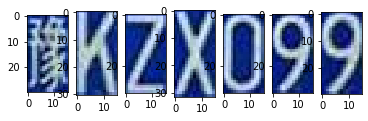

In [20]:


for i,j in enumerate(word_images):  
    plt.subplot(1,7,i+1)
    word_images[i]=cv2.cvtColor(word_images[i],cv2.COLOR_BGR2RGB)
    plt.imshow(word_images[i],cmap='gray')
plt.show()


In [21]:
import os
def read_directory(directory_name):
    referImg_list = []
    for filename in os.listdir(directory_name):
        referImg_list.append(directory_name + "/" + filename)
    return referImg_list

In [22]:
# 获得中文模板列表（只匹配车牌的第一个字符）
def get_chinese_words_list():
    chinese_words_list = []
    for i in range(34,64):
        #将模板存放在字典中
        c_word = read_directory('./refer1/'+ template[i])
        chinese_words_list.append(c_word)
    return chinese_words_list
chinese_words_list = get_chinese_words_list()

In [23]:
# 获得英文模板列表（只匹配车牌的第二个字符）
def get_eng_words_list():
    eng_words_list = []
    for i in range(10,34):
        e_word = read_directory('./refer1/'+ template[i])
        eng_words_list.append(e_word)
    return eng_words_list
eng_words_list = get_eng_words_list()

In [24]:
# 获得英文和数字模板列表（匹配车牌后面的字符）
def get_eng_num_words_list():
    eng_num_words_list = []
    for i in range(0,34):
        word = read_directory('./refer1/'+ template[i])
        eng_num_words_list.append(word)
    return eng_num_words_list
eng_num_words_list = get_eng_num_words_list()

In [25]:
# 读取一个模板地址与图片进行匹配，返回得分
def template_score(template,image):
    #将模板进行格式转换
    template_img=cv2.imdecode(np.fromfile(template,dtype=np.uint8),1)
    template_img = cv2.cvtColor(template_img, cv2.COLOR_RGB2GRAY)
    #模板图像阈值化处理——获得黑白图
    ret, template_img = cv2.threshold(template_img, 0, 255, cv2.THRESH_OTSU)
    
#     height, width = template_img.shape
#     image_ = image.copy()
#     image_ = cv2.resize(image_, (width, height))
    image_ = image.copy()
    image_ = cv2.cvtColor(image_, cv2.COLOR_RGB2GRAY)
    ret, image_ = cv2.threshold(image_, 0, 255, cv2.THRESH_OTSU)
    #获得待检测图片的尺寸
    height,width = image_.shape[:2]
    # 将模板resize至与图像一样大小
    template_img = cv2.resize(template_img, (width, height))
#     print(image.shape)
#     print(template_img.shape)
    # 模板匹配，返回匹配得分
    result = cv2.matchTemplate(image_, template_img, cv2.TM_CCOEFF)
    return result[0][0]

In [26]:
# 对分割得到的字符逐一匹配
def template_matching(word_images):
    results = []
    for index,word_image in enumerate(word_images):
        if index==0:
            best_score = []
            for chinese_words in chinese_words_list:
                score = []
                for chinese_word in chinese_words:
                    result = template_score(chinese_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            # print(template[34+i])
            r = template[34+i]
            results.append(r)
            continue
        if index==1:
            best_score = []
            for eng_word_list in eng_words_list:
                score = []
                for eng_word in eng_word_list:
                    result = template_score(eng_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            # print(template[10+i])
            r = template[10+i]
            results.append(r)
            continue
        else:
            best_score = []
            for eng_num_word_list in eng_num_words_list:
                score = []
                for eng_num_word in eng_num_word_list:
                    result = template_score(eng_num_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            # print(template[i])
            r = template[i]
            results.append(r)
            continue
    return results

In [27]:
word_images_ = word_images.copy()
result = template_matching(word_images_)
print(result)
# "".join(result)函数将列表转换为拼接好的字符串，方便结果显示
print( "".join(result))

['豫', 'K', 'Z', 'X', '0', '9', '9']
豫KZX099


In [28]:
text="".join(result)


In [34]:
print(text)

豫KZX099


In [37]:

# image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
# font=cv2.FONT_HERSHEY_PLAIN
# cv2.putText(image,str(text),(80,80),font,2,(200,200,10),cv2.LINE_AA)


In [36]:
# cv2.imshow('image_img',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()